In [27]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# Load the dataset
data = pd.read_csv("titanic.csv")  # Replace with the correct file path

In [29]:
# Explore the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# Preprocessing
# Fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)
# Fill missing Embarked values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Drop Cabin as it has too many missing values
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [33]:
# Encode categorical variables
label_enc = LabelEncoder()
data['Sex'] = label_enc.fit_transform(data['Sex'])
data['Embarked'] = label_enc.fit_transform(data['Embarked'])

In [34]:
# Define features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

In [35]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
# Make predictions
y_pred = clf.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [39]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


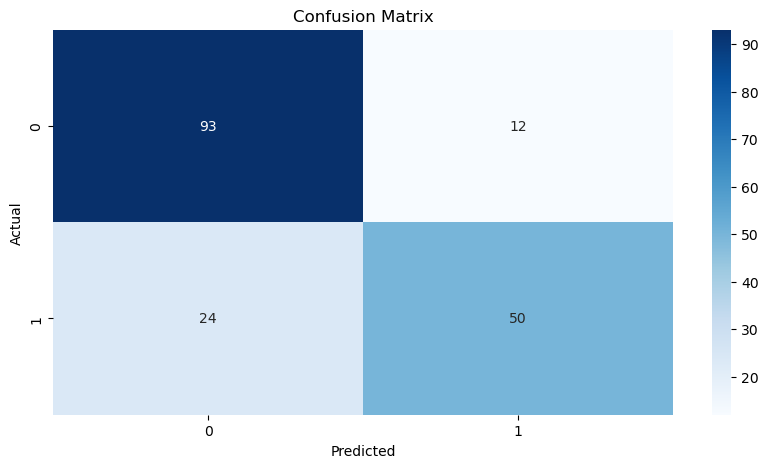

In [40]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



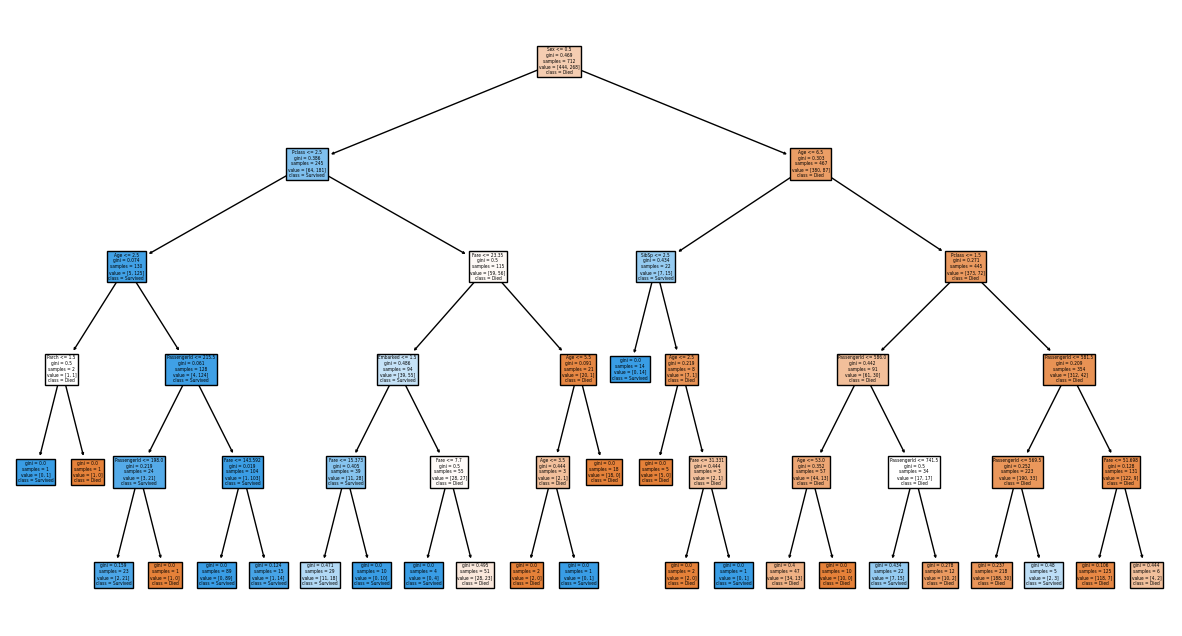

In [42]:
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()